In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [57]:
df = pd.read_csv('data/preprocessed_telecom_data.csv')

In [58]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [59]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


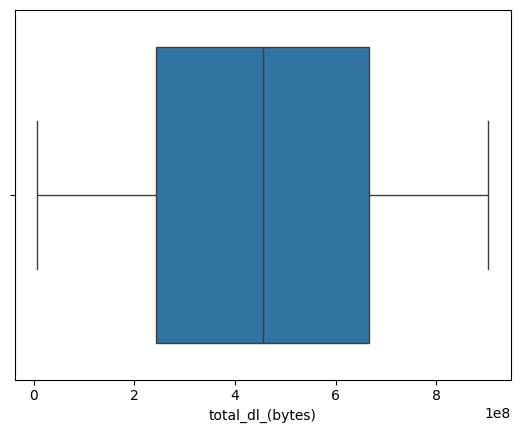

In [60]:
# Outlier detection
sns.boxplot(x=df['total_dl_(bytes)'])
plt.show()

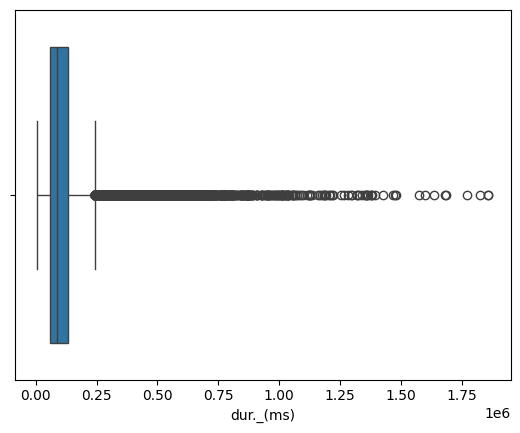

In [61]:
# Outlier detection
sns.boxplot(x=df['dur._(ms)'])
plt.show()

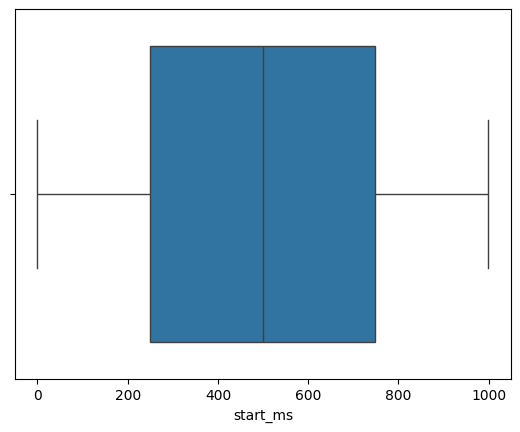

In [62]:
# Outlier detection
sns.boxplot(x=df['start_ms'])
plt.show()

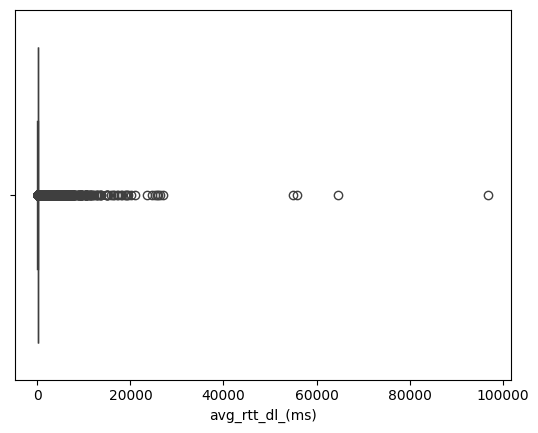

In [63]:
# Outlier detection
sns.boxplot(x=df['avg_rtt_dl_(ms)'])
plt.show()

Seems Like there are outliers so lets calculate them

In [64]:

from src.outliers import Outliers

In [65]:
outlier = Outliers(df)

In [66]:
numerical_cols = outlier.get_numerical_columns(df)

In [67]:
sample_outliers = outlier.Inter_quatile_method(df['dl_tp_<_50_kbps_(%)'])
sample_outliers

18352

In [68]:
for col in numerical_cols:
    sample_outliers = outlier.calculate_num_outliers_zscore(df[col])
    print(f"Outliers Z-Score of COLUMN: {col}", sample_outliers)

Outliers Z-Score of COLUMN: bearer_id 0
Outliers Z-Score of COLUMN: start_ms 0
Outliers Z-Score of COLUMN: end_ms 0
Outliers Z-Score of COLUMN: dur._(ms) 2214
Outliers Z-Score of COLUMN: imsi 3
Outliers Z-Score of COLUMN: msisdn/number 2
Outliers Z-Score of COLUMN: imei 0
Outliers Z-Score of COLUMN: avg_rtt_dl_(ms) 818
Outliers Z-Score of COLUMN: avg_rtt_ul_(ms) 751
Outliers Z-Score of COLUMN: avg_bearer_tp_dl_(kbps) 2983
Outliers Z-Score of COLUMN: avg_bearer_tp_ul_(kbps) 4269
Outliers Z-Score of COLUMN: dl_tp_<_50_kbps_(%) 3467
Outliers Z-Score of COLUMN: 50_kbps_<_dl_tp_<_250_kbps_(%) 3462
Outliers Z-Score of COLUMN: 250_kbps_<_dl_tp_<_1_mbps_(%) 3147
Outliers Z-Score of COLUMN: dl_tp_>_1_mbps_(%) 3464
Outliers Z-Score of COLUMN: ul_tp_<_10_kbps_(%) 2199
Outliers Z-Score of COLUMN: 10_kbps_<_ul_tp_<_50_kbps_(%) 2018
Outliers Z-Score of COLUMN: 50_kbps_<_ul_tp_<_300_kbps_(%) 1029
Outliers Z-Score of COLUMN: ul_tp_>_300_kbps_(%) 749
Outliers Z-Score of COLUMN: activity_duration_dl_(ms

In [69]:
df_ = df.copy()
df_

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  float64
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  float64
 7   msisdn/number                   150001 non-null  float64
 8   imei                            150001 non-null  float64
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

In [71]:
df_ = df.query("`handset_manufacturer` != 'undefined' and `handset_type` != 'undefined'")[df.columns]

In [72]:
df_.to_csv('data/outliers_clean.csv', index=False)

In [73]:
df_.shape

(141014, 45)